<a href="https://colab.research.google.com/github/zephyrroche/Uber-Data-Analysis/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. In which category do people book the most Uber rides?
2. For which purpose do people book Uber rides the most?
3. At what time do people book cabs the most from Uber?
4. In which months do people book Uber rides less frequently?
5. On the days of the week do people book Uber rides the most?
6. How many miles do people usually book a cab through Uber?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving UberDataset.csv to UberDataset.csv


In [4]:
df = pd.read_csv('UberDataset.csv')

In [5]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [6]:
df.shape

(1156, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [8]:
df['PURPOSE'].fillna("NOT", inplace=True)

<ipython-input-8-a605b6c46904>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT", inplace=True)


In [10]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [12]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

In [13]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [14]:
df['day-night'] = pd.cut(x=df['time'], bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [15]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(413, 10)

# In which category do people book the most Uber rides?

<Axes: xlabel='count', ylabel='CATEGORY'>

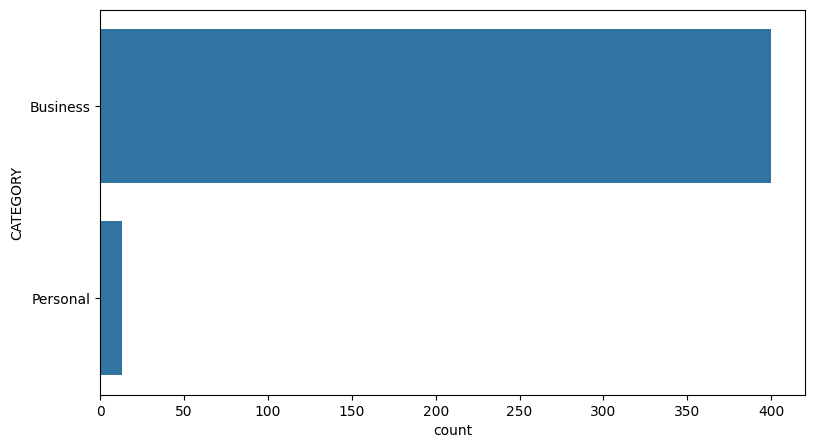

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])

**People usually book Ubers for Business than personal outings.**

# For which purpose do people book Uber rides the most?

<Axes: xlabel='count', ylabel='PURPOSE'>

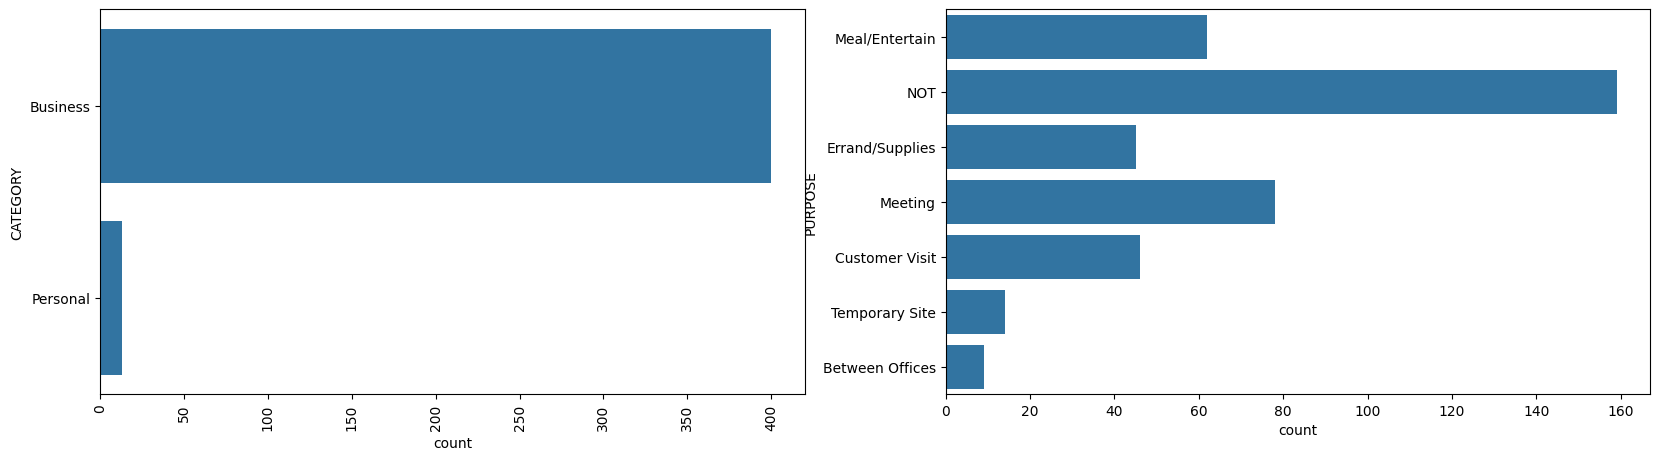

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])

plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])

**Mainly it's for business meetings.**

# At what time do people book cabs the most from Uber?

<Axes: xlabel='count', ylabel='day-night'>

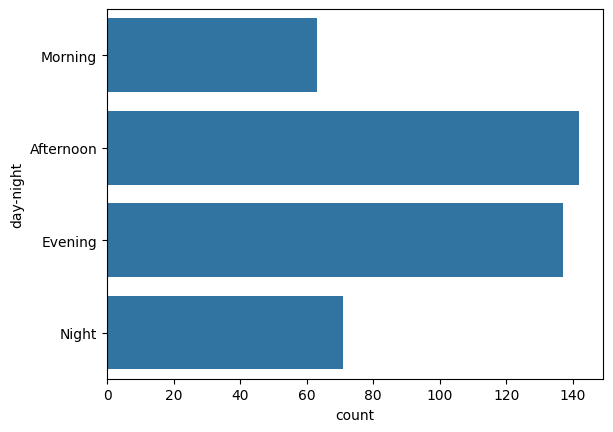

In [20]:
sns.countplot(df['day-night'])

**Afternoon is the most frequent**

# In which months do people book Uber rides less frequently?

In [22]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

month_label = {1.0:'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0:'Apr',
               5.0:'May', 6.0:'June', 7.0:'July', 8.0:'Aug',
               9.0: 'Sep', 10.0:'Oct', 11.0:'Nov', 12.0:'Dec'}

df['MONTH'] = df.MONTH.map(month_label)

mon = df.MONTH.value_counts(sort=False)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

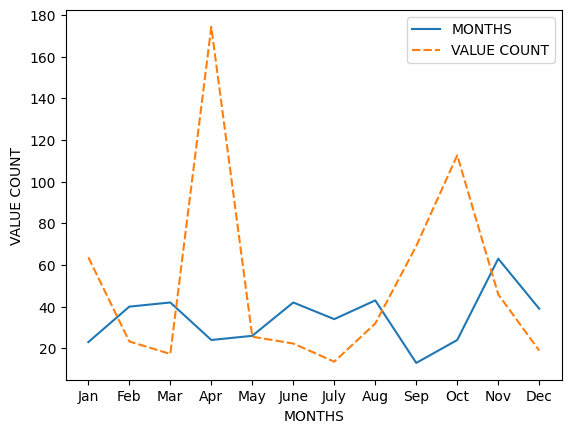

In [23]:
df = pd.DataFrame({
    "MONTHS":mon.values,
    "VALUE COUNT":df.groupby('MONTH',sort=False)['MILES'].max()
})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

**During the winter (November, December, January, February)**

# On the days of the week do people book Uber rides the most?

In [41]:
df['DAY'] = df.START_DATE.dt.weekday

data_label = {
    0: 'Mon', 1:'Tue', 2: 'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

df['DAY'] = df['DAY'].map(data_label)

AttributeError: 'DataFrame' object has no attribute 'START_DATE'

In [34]:
df.head()

,MONTHS,VALUE COUNT
MONTH,,
Jan,23,63.7
Feb,40,23.3
Mar,42,17.3
Apr,24,174.2
May,26,25.6


In [35]:
day_data = df.DAY.value_counts()

sns.barplot(x=data_label.index, y=data_label)
plt.xlabel("DAY")
plt.ylabel("COUNT")

AttributeError: 'DataFrame' object has no attribute 'DAY'

**Friday is the most booked day while Sunday is the least.**

# How many miles do people usually book a cab through Uber?

In [ ]:
sns.boxplot(df[df['MILES']<100]['MILES'])

In [ ]:
sns.boxplot(df[df['MILES']<40]['MILES'])

In [ ]:
sns.distplot(df[df['MILES']<40]['MILES'])

**Maximum is 0-20 miles.**